#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

---

#### IMPORT CATFISH SALES DAT

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

---

#### CHECK DATASET FREQUENCY [Daily, Weekly, Monthly or Yearly]

We have a monthly frequency

In [6]:
catfish_sales.head(15)

Date
1986-01-01     9034
1986-02-01     9596
1986-03-01    10558
1986-04-01     9002
1986-05-01     9239
1986-06-01     8951
1986-07-01     9668
1986-08-01    10188
1986-09-01     9896
1986-10-01    10649
1986-11-01     8917
1986-12-01     8196
1987-01-01    10768
1987-02-01    12220
1987-03-01    14463
Freq: MS, Name: Total, dtype: int64

In [40]:
catfish_sales.tail()

Date
2012-08-01    14442
2012-09-01    13422
2012-10-01    13795
2012-11-01    13352
2012-12-01    12716
Freq: MS, Name: Total, dtype: int64

###### CHECK THE SHAPE OF DATASET

In [42]:
catfish_sales.shape

(324,)

###### CHECK FOR HOW MANY YEARS DATA WE HAVE

In [43]:
len(catfish_sales) / 12

27.0

---

#### CHECK INITIAL PLOT FOR SERIES VALUE DISTRIBUTION

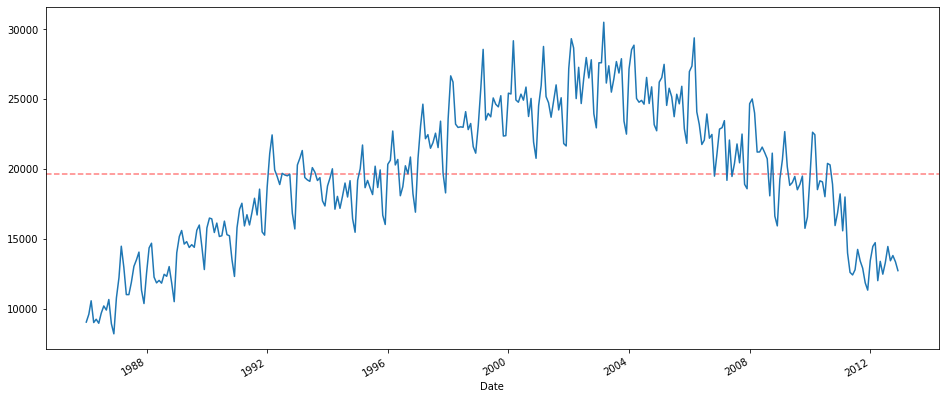

In [18]:
plt.figure(figsize = (16, 7))
plt.axhline(catfish_sales.mean(), color='r', alpha=0.5, linestyle = '--')
catfish_sales.plot()

In [66]:
pd.DataFrame(catfish_sales).Total.mean()

19643.984567901236

In [57]:
catfish_sales.mean()

19643.984567901236

---

#### PLOT A QQ_PLOT TO CHECK DISTRIBUTION

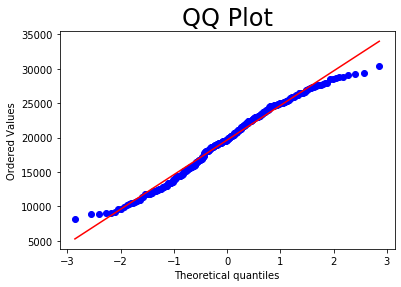

<Figure size 864x288 with 0 Axes>

In [67]:
import scipy.stats
import pylab

scipy.stats.probplot(catfish_sales, plot = pylab)
plt.title("QQ Plot", size = 24)
#plt.figure(figsize = (18, 8))
#pylab.figaspect(20)
pylab.figure(figsize = (12, 4))
pylab.show()

---

#### CREATE A SMALL SET OF DATA

In [68]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [69]:
lim_catfish_sales.shape

(49,)

---

#### CHECK PLOT ON SMALL_SET

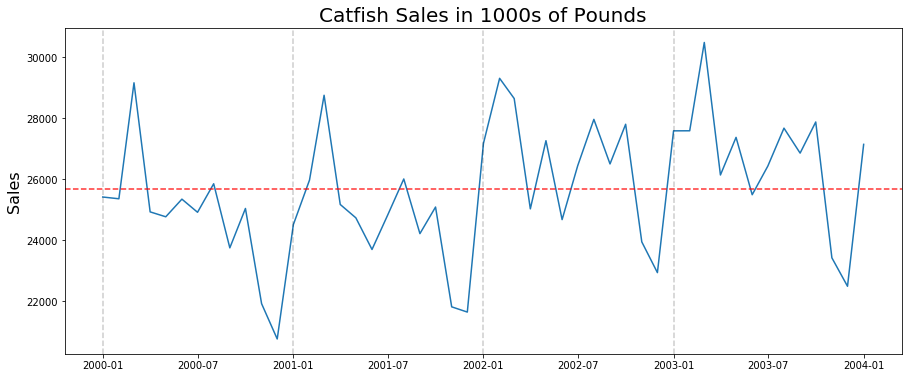

In [121]:
plt.figure(figsize=(15,6))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_catfish_sales.mean(), color='r', alpha=0.8, linestyle='--')

As seen from the initial plot we can make it out, there is fluctuation in the MEAN Values.

At some time-stamp it is higher and other time-stamp it is lower.

---

#### DIFFERENCEING - FIRST

In FIRST DIFFERENCING, from present VALUE we MINUS previous value.

In [74]:
first_diff = lim_catfish_sales.diff()[1:]

In [75]:
first_diff.head()

Date
2000-02-01     -58.0
2000-03-01    3807.0
2000-04-01   -4237.0
2000-05-01    -161.0
2000-06-01     579.0
Freq: MS, Name: Total, dtype: float64

In [76]:
lim_catfish_sales.head()

Date
2000-01-01    25412
2000-02-01    25354
2000-03-01    29161
2000-04-01    24924
2000-05-01    24763
Freq: MS, Name: Total, dtype: int64

---

#### CREATE FIRST_DIFFERENCING PLOT

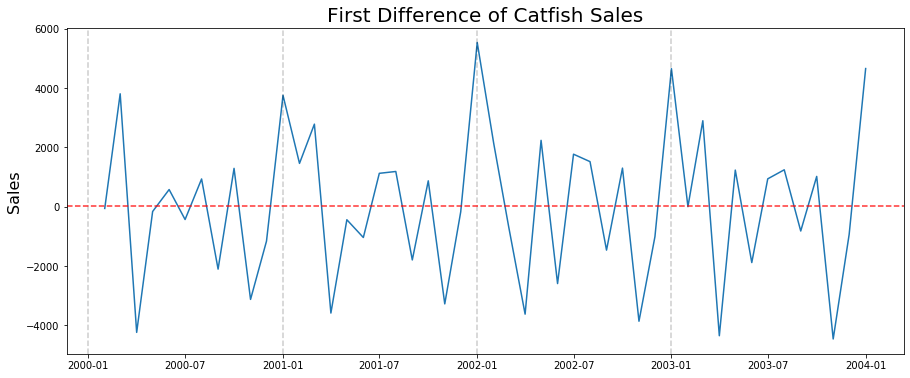

In [120]:
plt.figure(figsize=(15,6))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff.mean(), color='r', alpha=0.8, linestyle='--')

If we compare INITIAL PLOT v/s FIRST DIFFERENCE Plot.

It is visible that Values are around MEAN after FIRST DIFFERENCING.

---

#### CREATE ACF_PLOT

###### ACF LINE PLOT

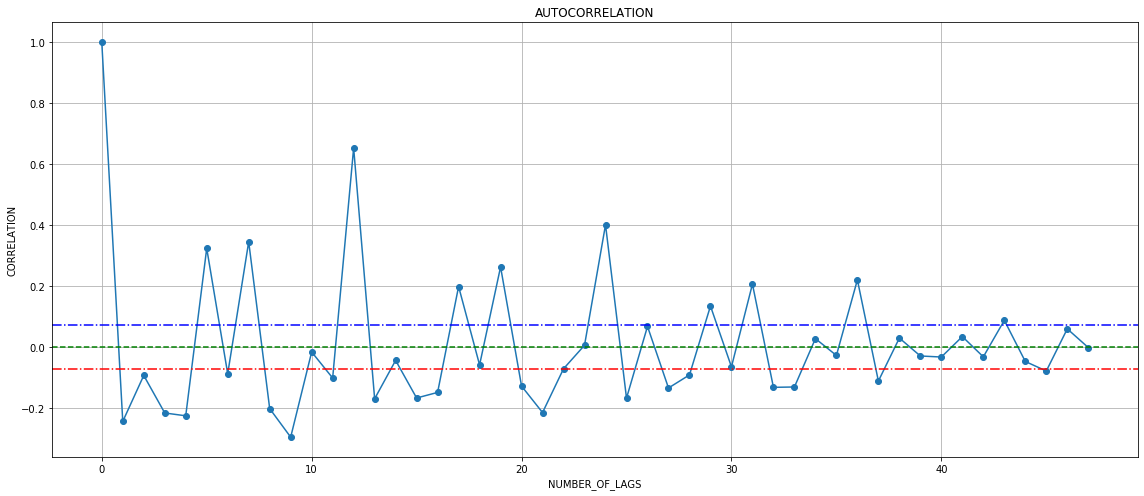

In [123]:
y = first_diff
# Calling AUTO CORRELATION FUNCTION
ACF_lag = acf(y, nlags = 500)

plt.figure(figsize = (16, 7))
plt.plot(ACF_lag, marker = 'o')
plt.axhline(y = 0, linestyle = '--', color = 'green')
plt.axhline(y = -0.5 / np.sqrt(len(y)), linestyle = '-.', color = 'red')
plt.axhline(y = 0.5 / np.sqrt(len(y)), linestyle = '-.', color = 'blue')
plt.title('AUTOCORRELATION')
plt.xlabel('NUMBER_OF_LAGS')
plt.ylabel('CORRELATION')
plt.grid()
plt.tight_layout()

Only the FIRST LAG is in exceptable zone and from LAG-2 it is going into Negative.

###### ACF BAR PLOT

<BarContainer object of 20 artists>

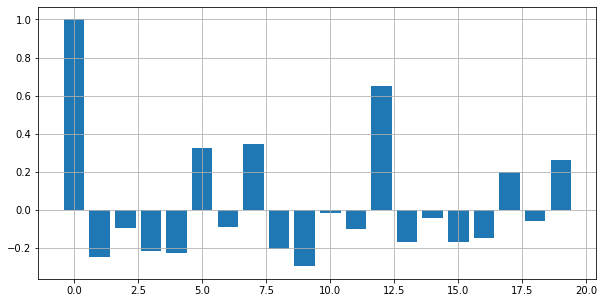

In [124]:
acf_vals = acf(first_diff, nlags = 50)
num_lags = 20
plt.figure(figsize = (10, 5))
plt.grid()
plt.bar(range(num_lags), acf_vals[:num_lags])

#### Based on ACF, we should start with MA(1) Process

---

#### CREATE PACF_PLOT

###### PACF LINE PLOT

In [126]:
y.shape

(48,)

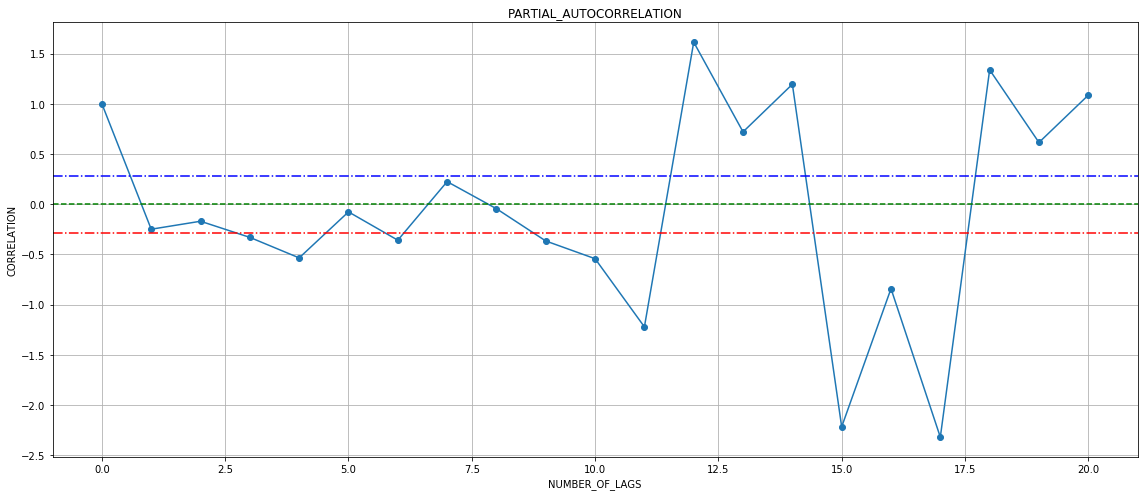

In [128]:
y = first_diff
# Calling AUTO CORRELATION FUNCTION
PACF_lag = pacf(y, nlags = 20)

plt.figure(figsize = (16, 7))
plt.plot(PACF_lag, marker = 'o')
plt.axhline(y = 0, linestyle = '--', color = 'green')
plt.axhline(y = -1.96 / np.sqrt(len(y)), linestyle = '-.', color = 'red')
plt.axhline(y = 1.96 / np.sqrt(len(y)), linestyle = '-.', color = 'blue')
plt.title('PARTIAL_AUTOCORRELATION')
plt.xlabel('NUMBER_OF_LAGS')
plt.ylabel('CORRELATION')
plt.grid()
plt.tight_layout()

###### PACF BAR PLOT

<BarContainer object of 20 artists>

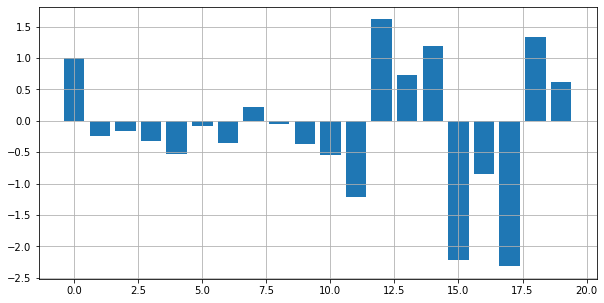

In [130]:
pacf_vals = pacf(first_diff, nlags = 20)
num_lags = 20
plt.figure(figsize = (10, 5))
plt.grid()
plt.bar(range(num_lags), pacf_vals[:num_lags])

#### Based on PACF, we should start with a AR(4) Process

---

#### CREATE TRAINING & TESTING SETS

We have 48 Values in our first_diff set

In [134]:
first_diff.shape

(48,)

In [135]:
first_diff.head(49)

Date
2000-02-01     -58.0
2000-03-01    3807.0
2000-04-01   -4237.0
2000-05-01    -161.0
2000-06-01     579.0
2000-07-01    -431.0
2000-08-01     936.0
2000-09-01   -2104.0
2000-10-01    1293.0
2000-11-01   -3125.0
2000-12-01   -1159.0
2001-01-01    3755.0
2001-02-01    1461.0
2001-03-01    2784.0
2001-04-01   -3585.0
2001-05-01    -439.0
2001-06-01   -1038.0
2001-07-01    1126.0
2001-08-01    1188.0
2001-09-01   -1794.0
2001-10-01     873.0
2001-11-01   -3276.0
2001-12-01    -172.0
2002-01-01    5538.0
2002-02-01    2135.0
2002-03-01    -663.0
2002-04-01   -3622.0
2002-05-01    2238.0
2002-06-01   -2591.0
2002-07-01    1771.0
2002-08-01    1520.0
2002-09-01   -1463.0
2002-10-01    1302.0
2002-11-01   -3861.0
2002-12-01   -1009.0
2003-01-01    4654.0
2003-02-01       2.0
2003-03-01    2899.0
2003-04-01   -4350.0
2003-05-01    1235.0
2003-06-01   -1883.0
2003-07-01     940.0
2003-08-01    1245.0
2003-09-01    -819.0
2003-10-01    1022.0
2003-11-01   -4459.0
2003-12-01    -934.0
2004-01-

We will Create TRAINING SET with Values from 1 to 42 - 42 VALUES

And TESTING SET will be from 43 to 48 - 6 Values

In [136]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

In [141]:
print(train_data.shape)
print(test_data.shape)

(42,)
(6,)


---

#### FIT ARMA MODEL

###### IMPORT ARIMA

In [151]:
from statsmodels.tsa.arima.model import ARIMA

###### DEFINE MODEL

In [149]:
model = ARIMA(train_data, order=(4, 0, 1))

###### FIT THE MODEL

In [152]:
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.5680842399597168


---

#### SUMMARY OF MODEL

In [155]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   42
Model:                 ARIMA(4, 0, 1)   Log Likelihood                -376.598
Date:                Sat, 28 May 2022   AIC                            767.195
Time:                        10:27:52   BIC                            779.359
Sample:                    02-01-2000   HQIC                           771.654
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1795    179.935      0.134      0.893    -328.487     376.846
ar.L1         -0.8659      0.222     -3.896      0.000      -1.302      -0.430
ar.L2         -0.4234      0.246     -1.724      0.0

#### So the ARMA(4, 0, 1) model is:

#### $\hat{y_t} = -0.87y_{t-1} - 0.42y_{t-2} - 0.56y_{t-3} - 0.61y_{t-4} + 0.52\varepsilon_{t-1}$

###### GET PREDICTION START & END DATES

In [157]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

###### GET PREDICTIONS & RESIDUALS

In [158]:
#get the predictions and residuals
predictions = model_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data - predictions

---

#### CREATE RESIDUAL PLOT

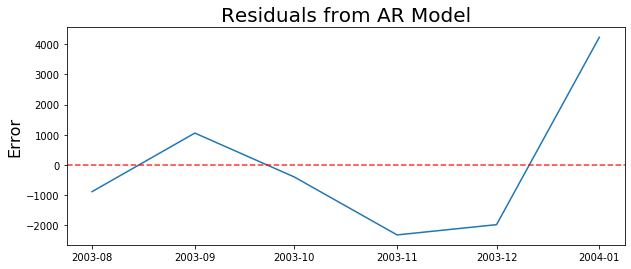

In [167]:
plt.figure(figsize = (10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize = 20)
plt.ylabel('Error', fontsize = 16)
plt.axhline(0, color = 'r', linestyle = '--', alpha = 0.8)

---

#### FIRST DIFFERENCE ACTUAL v/s PREDICTIONS

Text(0, 0.5, 'Sales')

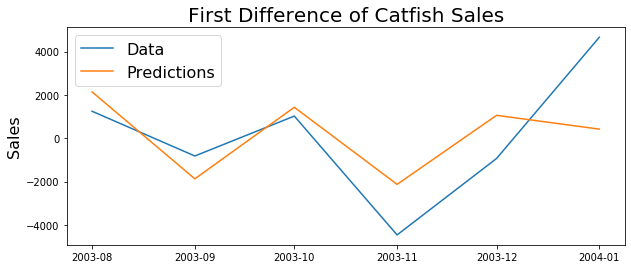

In [168]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize = 16)

plt.title('First Difference of Catfish Sales', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)

As seen PREDICTIONS are moving with the Data, but there is lot of gap between REAL v/s PREDICTIONS.

---

#### ROOT MEAN SQUARED ERROR

In [169]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 2214.699690348423


---

### CREATE SECOND DIFFERENCE

In [185]:
second_diff = first_diff.diff()[1:]

#### CREATE SECOND DIFFERENCE INITIAL PLOT

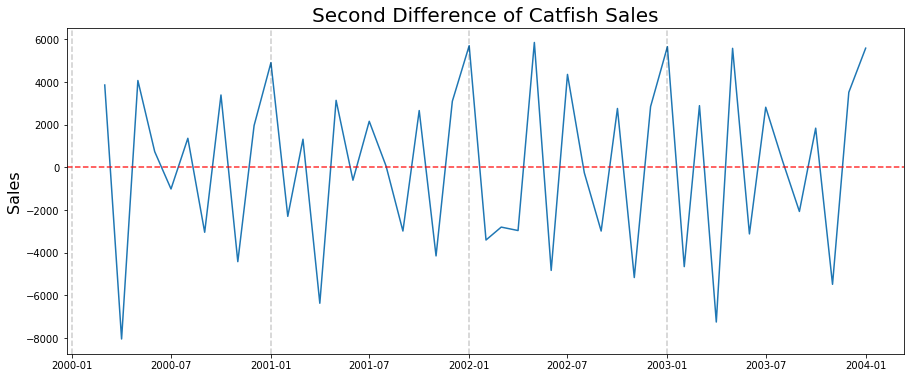

In [192]:
plt.figure(figsize = (15,6))
plt.plot(second_diff)
plt.title('Second Difference of Catfish Sales', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--', alpha = 0.2)
plt.axhline(first_diff.mean(), color = 'r', alpha = 0.8, linestyle = '--')

###### CREATE TRAIN & TEST SPLIT

In [187]:
train_data = second_diff[:train_end]
test_data = second_diff[train_end + timedelta(days=1):test_end]

###### DEFINE MODEL

In [188]:
model4_0_2 = ARIMA(train_data, order=(4, 0, 2))

###### FIT MODEL

In [189]:
start = time()
model_fit_4_0_2 = model4_0_2.fit()
end = time()
print('Model Fitting Time:', end - start)

C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Model Fitting Time: 0.3998830318450928


###### SUMMARY OF THE MODEL

In [190]:
print(model_fit_4_0_2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   41
Model:                 ARIMA(4, 0, 2)   Log Likelihood                -370.836
Date:                Sat, 28 May 2022   AIC                            757.672
Time:                        20:26:47   BIC                            771.380
Sample:                    03-01-2000   HQIC                           762.663
                         - 07-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5112     16.799      0.328      0.743     -27.415      38.437
ar.L1         -0.8621      0.257     -3.350      0.001      -1.366      -0.358
ar.L2         -0.4113      0.259     -1.589      0.1

###### GET THE PREDICTIONS & RESIDUALS

In [191]:
predictions_4_0_2 = model_fit_4_0_2.predict(start = pred_start_date, end = pred_end_date)
residuals_4_0_2 = test_data - predictions_4_0_2

#### CREATE RESIDUAL PLOT

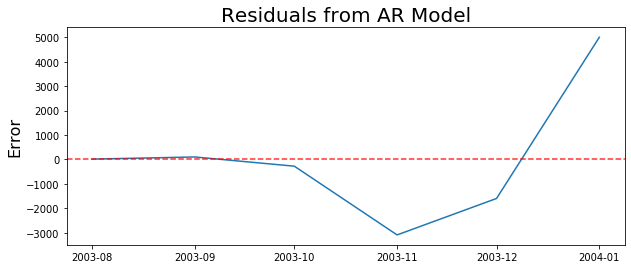

In [174]:
plt.figure(figsize = (10,4))
plt.plot(residuals_4_0_2)
plt.title('Residuals from AR Model', fontsize = 20)
plt.ylabel('Error', fontsize = 16)
plt.axhline(0, color = 'r', linestyle = '--', alpha = 0.8)

#### FIRST DIFFERENCE ACTUAL v/s PREDICTIONS

Text(0, 0.5, 'Sales')

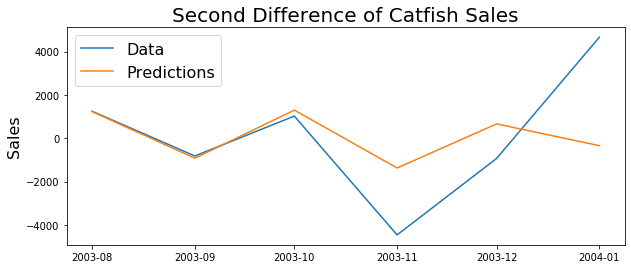

In [183]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions_4_0_2)

plt.legend(('Data', 'Predictions'), fontsize = 16)

plt.title('Second Difference of Catfish Sales', fontsize = 20)
plt.ylabel('Sales', fontsize = 16)